In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
machines = pd.read_csv("data/machines_full.csv")

In [3]:
machines["mathias"] = machines["type"].apply(lambda x: "system prompt matias/" in x)

In [4]:
matias = machines[machines["mathias"]]

In [5]:
matias[['prompt', 'model']] = matias["type"].apply(lambda x: pd.Series(x.split("/")[1:3]))

/tmp/ipykernel_505/4206862483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matias[['prompt', 'model']] = matias["type"].apply(lambda x: pd.Series(x.split("/")[1:3]))
/tmp/ipykernel_505/4206862483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matias[['prompt', 'model']] = matias["type"].apply(lambda x: pd.Series(x.split("/")[1:3]))


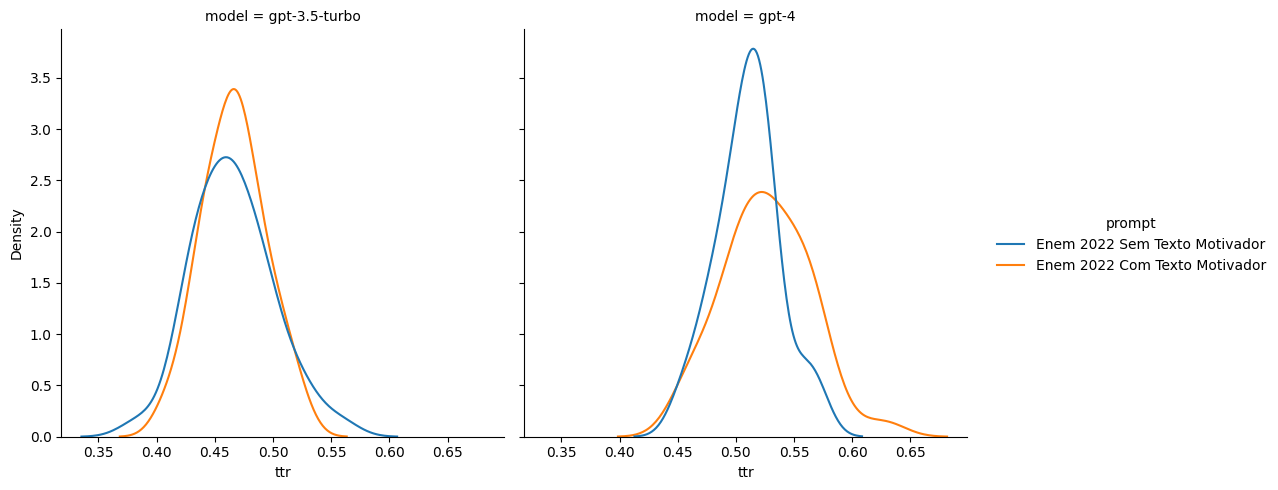

In [20]:
sns.displot(matias,hue="prompt",x="ttr",col="model",kind="kde")

In [ ]:
matias["prompt"].unique()

In [22]:
from scipy.stats import ttest_ind
from scipy.stats import anderson


grouped_data = matias.groupby('prompt')

group1 = grouped_data.get_group("gpt-4")
group2 = grouped_data.get_group("gpt-3.5-turbo")

ttest_results = {
    'Feature': [],
    'T-Statistic': [],
    'P-Value': [],
    'Significant': [],
    'Normality': []
}
for column in matias.select_dtypes(include='number').columns:
    # Extract the data for each group for the current column
    data1 = group1[column]
    data2 = group2[column]
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(data1, data2,permutations=100)
    
    # Determine if the result is significant (p-value < 0.05)
    significant = p_value < 0.05

    normal = anderson(data1, 'norm').statistic < 0.05
    
    # Store the results in the dictionary
    ttest_results['Feature'].append(column)
    ttest_results['T-Statistic'].append(t_stat)
    ttest_results['P-Value'].append(p_value)
    ttest_results['Significant'].append(significant)
    ttest_results['Normality'].append(normal)

In [25]:
results_df = pd.DataFrame(ttest_results)
results_df.sort_values(by = 'Significant',inplace=True)

In [26]:
significant_ones = results_df[results_df["Significant"]== True]
significant_ones

,Feature,T-Statistic,P-Value,Significant,Normality
1,MLS,-5.063867,0.000100,True,False
2,MLT,-8.559552,0.000100,True,False
4,DCT,-7.558711,0.000100,True,False
5,CPC,-8.713944,0.000100,True,False
6,CPT,-11.384947,0.000100,True,False
7,TS,9.601992,0.000100,True,False
8,lexical_density,-2.640397,0.009799,True,False
9,lexical_sophistication,-3.469199,0.001400,True,False
10,ttr,10.329858,0.000100,True,False
11,d-measure,10.101554,0.000100,True,False
